# Univariate Parametric Anomaly Detection

This notebook demonstrates how to detect univariate anomalies using parametric methods.

## Import necessary libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.stats import t

## Define colors and load dataset

In [2]:
# Define the colors to be used in the plot.
colors = [
    "#2580B7", # Blue
    "#C03B26", # Red
    "#44546A", # Gray
]

# Load the tips dataset.
tips = sns.load_dataset("tips")

# Convert to DataFrame for easier handling.
data = tips["tip"].values
df = pd.DataFrame(data, columns=["value"])

## Method 1: Maximum Likelihood Method

Assumes Gaussian distribution and uses 3σ threshold.

In [3]:
mean_ml = np.mean(df["value"])
std_dev_ml = np.std(df["value"])
THRESHOLD_ML = 3  # Typical threshold for anomaly detection.
df["ML_anomaly"] = abs(df["value"] - mean_ml) > (THRESHOLD_ML * std_dev_ml)

## Method 2: IQR Method

In [4]:
Q1 = df["value"].quantile(0.25)
Q3 = df["value"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df["IQR_anomaly"] = (df["value"] < lower_bound) | (df["value"] > upper_bound)

## Method 3: Grubb's Test

In [5]:
ALPHA = 0.05
N = len(df["value"])
t_crit = t.ppf(1 - ALPHA / (2 * N), N - 2)
G_crit = ((N - 1) / np.sqrt(N)) * np.sqrt(t_crit**2 / (N - 2 + t_crit**2))
mean_grubbs = np.mean(df["value"])
std_dev_grubbs = np.std(df["value"])
G_scores = abs(df["value"] - mean_grubbs) / std_dev_grubbs
# df["Grubbs_anomaly"] = G_scores > G_crit
df["Grubbs_anomaly"] = \
    G_scores == max(G_scores) if max(G_scores) > G_crit else False

## Visualization

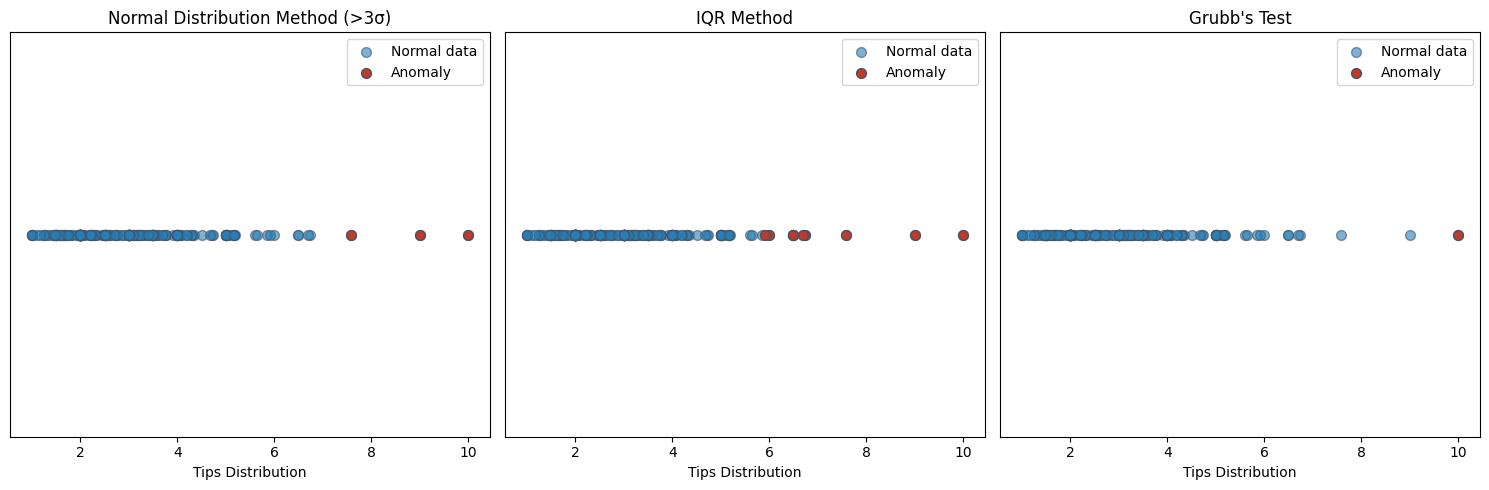

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot for Normal Distribution Method.
axes[0].scatter(
    df["value"], np.zeros_like(df["value"]),
    c=colors[0], s=50, edgecolor=colors[-1], alpha=0.6,
    label="Normal data"
)
axes[0].scatter(
    df["value"][df["ML_anomaly"]], np.zeros_like(df["value"][df["ML_anomaly"]]),
    c=colors[1], s=50, edgecolor=colors[-1], alpha=1.0,
    label="Anomaly"
)
axes[0].set_title("Normal Distribution Method (>3σ)")
axes[0].set_xlabel("Tips Distribution")
axes[0].set_yticks([])
axes[0].legend()

# Plot for IQR Method.
axes[1].scatter(
    df["value"], np.zeros_like(df["value"]),
    c=colors[0], s=50, edgecolor=colors[-1], alpha=0.6,
    label="Normal data"
)
axes[1].scatter(
    df["value"][df["IQR_anomaly"]],
    np.zeros_like(df["value"][df["IQR_anomaly"]]),
    c=colors[1], s=50, edgecolor=colors[-1], alpha=1.0,
    label="Anomaly"
)
axes[0].set_yticks([])
axes[1].set_title("IQR Method")
axes[1].set_xlabel("Tips Distribution")
axes[1].set_yticks([])
axes[1].legend()

# Plot for Grubb's Test
axes[2].scatter(
    df["value"], np.zeros_like(df["value"]),
    c=colors[0], s=50, edgecolor=colors[-1], alpha=0.6,
    label="Normal data"
)
axes[2].scatter(
    df["value"][df["Grubbs_anomaly"]],
    np.zeros_like(df["value"][df["Grubbs_anomaly"]]),
    c=colors[1], s=50, edgecolor=colors[-1], alpha=1.0,
    label="Anomaly"
)
axes[2].set_title("Grubb's Test")
axes[2].set_xlabel("Tips Distribution")
axes[2].set_yticks([])
axes[2].legend()

plt.tight_layout()
plt.show()